In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import re

In [2]:
def visualize(log_text, hyperparam, metric_name):

    param_names_match = re.search(r"Parameters: \[(.*?)\]", log_text)
    param_names = eval(f"[{param_names_match.group(1)}]") 
    param_index = param_names.index(hyperparam)

    param_tuples = re.findall(r"Parameters: .*?=\((.*?)\)", log_text)
    param_values = [eval(f"({tup})")[param_index] for tup in param_tuples]
    print("param_values:", param_values)

    metric_pattern = re.compile(r"best test:.*?" + re.escape(metric_name) + r":\s*([\d\.]+)")
    metric_values = [float(m.group(1)) for m in metric_pattern.finditer(log_text)]
    print("metric_values:", metric_values)

    sorted_pairs = sorted(zip(param_values, metric_values))
    x_vals, y_vals = zip(*sorted_pairs)

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, marker='o')
    plt.title(f'{metric_name} vs {hyperparam}')
    plt.xlabel(hyperparam)
    plt.ylabel(metric_name)
    plt.xscale('log')  
    plt.xlim(min(x_vals), max(x_vals)) 
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
proj_log_text = """
Sun 06 Apr 2025 14:10:41 INFO 
============All Over=====================
Sun 06 Apr 2025 14:10:41 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0257    recall@10: 0.0427    recall@20: 0.0692    ndcg@5: 0.0173    ndcg@10: 0.0228    ndcg@20: 0.0295    ,
 best test: recall@5: 0.0270    recall@10: 0.0431    recall@20: 0.0695    ndcg@5: 0.0182    ndcg@10: 0.0235    ndcg@20: 0.0303    
Sun 06 Apr 2025 14:10:41 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0263    recall@10: 0.0434    recall@20: 0.0706    ndcg@5: 0.0174    ndcg@10: 0.0229    ndcg@20: 0.0298    ,
 best test: recall@5: 0.0276    recall@10: 0.0449    recall@20: 0.0722    ndcg@5: 0.0184    ndcg@10: 0.0241    ndcg@20: 0.0310    
Sun 06 Apr 2025 14:10:41 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0214    recall@10: 0.0321    recall@20: 0.0522    ndcg@5: 0.0141    ndcg@10: 0.0176    ndcg@20: 0.0226    ,
 best test: recall@5: 0.0206    recall@10: 0.0329    recall@20: 0.0526    ndcg@5: 0.0138    ndcg@10: 0.0179    ndcg@20: 0.0229    
Sun 06 Apr 2025 14:10:41 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0195    recall@10: 0.0297    recall@20: 0.0490    ndcg@5: 0.0127    ndcg@10: 0.0160    ndcg@20: 0.0209    ,
 best test: recall@5: 0.0185    recall@10: 0.0299    recall@20: 0.0496    ndcg@5: 0.0125    ndcg@10: 0.0162    ndcg@20: 0.0212    
Sun 06 Apr 2025 14:10:41 INFO """

param_values: [0.0001, 0.001, 0.01, 0.1]
metric_values: [0.0695, 0.0722, 0.0526, 0.0496]


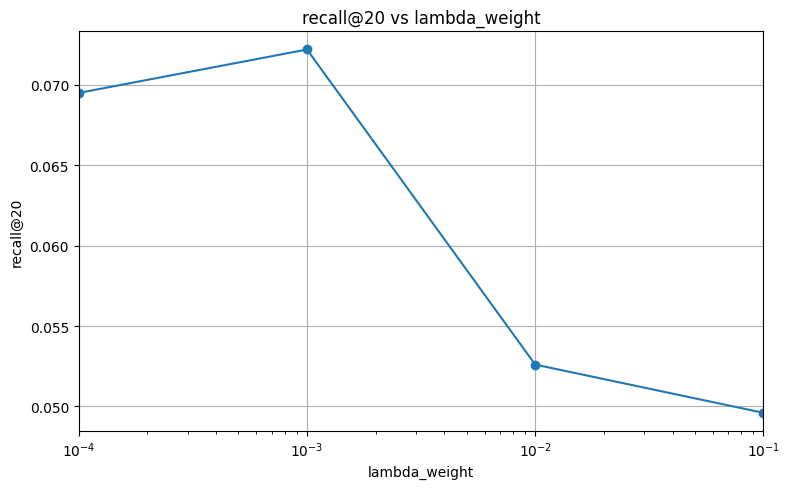

In [13]:
visualize(proj_log_text, 'lambda_weight', 'recall@20')

In [14]:
cl_logs_text = """Sun 06 Apr 2025 14:37:51 INFO 
============All Over=====================
Sun 06 Apr 2025 14:37:51 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0265    recall@10: 0.0424    recall@20: 0.0697    ndcg@5: 0.0179    ndcg@10: 0.0230    ndcg@20: 0.0300    ,
 best test: recall@5: 0.0277    recall@10: 0.0439    recall@20: 0.0695    ndcg@5: 0.0186    ndcg@10: 0.0239    ndcg@20: 0.0305    
Sun 06 Apr 2025 14:37:51 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0274    recall@10: 0.0443    recall@20: 0.0705    ndcg@5: 0.0183    ndcg@10: 0.0238    ndcg@20: 0.0304    ,
 best test: recall@5: 0.0281    recall@10: 0.0437    recall@20: 0.0713    ndcg@5: 0.0189    ndcg@10: 0.0240    ndcg@20: 0.0311    
Sun 06 Apr 2025 14:37:51 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0280    recall@10: 0.0453    recall@20: 0.0729    ndcg@5: 0.0181    ndcg@10: 0.0238    ndcg@20: 0.0307    ,
 best test: recall@5: 0.0259    recall@10: 0.0432    recall@20: 0.0710    ndcg@5: 0.0173    ndcg@10: 0.0229    ndcg@20: 0.0301    
Sun 06 Apr 2025 14:37:51 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.3),
 best valid: recall@5: 0.0227    recall@10: 0.0401    recall@20: 0.0669    ndcg@5: 0.0146    ndcg@10: 0.0202    ndcg@20: 0.0271    ,
 best test: recall@5: 0.0240    recall@10: 0.0415    recall@20: 0.0659    ndcg@5: 0.0157    ndcg@10: 0.0214    ndcg@20: 0.0276    
Sun 06 Apr 2025 14:37:51 INFO """

param_values: [0.0001, 0.001, 0.01, 0.1]
metric_values: [0.0695, 0.0713, 0.071, 0.0659]


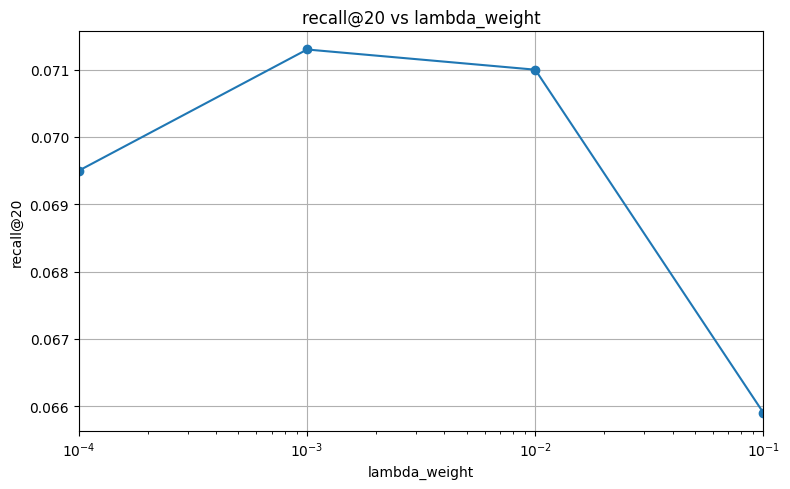

In [15]:
visualize(cl_logs_text, 'lambda_weight', 'recall@20')

In [2]:
from collections import defaultdict

def visualize(log_text, hyperparam, metric_name):

    param_names_match = re.search(r"Parameters: \[(.*?)\]", log_text)
    param_names = eval(f"[{param_names_match.group(1)}]")
    param_index = param_names.index(hyperparam)

    param_tuples = re.findall(r"Parameters: .*?=\((.*?)\)", log_text)
    param_dicts = [dict(zip(param_names, eval(f"({tup})"))) for tup in param_tuples]

    metric_pattern = re.compile(r"best test:.*?" + re.escape(metric_name) + r":\s*([\d\.]+)")
    metric_values = [float(m.group(1)) for m in metric_pattern.finditer(log_text)]

    grouped = defaultdict(list)
    for param_dict, metric in zip(param_dicts, metric_values):
        grouped[param_dict[hyperparam]].append(metric)

    x_vals = []
    y_vals = []
    for key in sorted(grouped.keys()):
        x_vals.append(key)
        y_vals.append(sum(grouped[key]) / len(grouped[key]))

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, marker='o')
    plt.title(f'{metric_name} vs {hyperparam} (averaged)')
    plt.xlabel(hyperparam)
    plt.ylabel(metric_name)
    if min(x_vals) > 0 and max(x_vals)/min(x_vals) > 100:
        plt.xscale('log')
    plt.xlim(min(x_vals), max(x_vals))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
input_logs_text = """Tue 08 Apr 2025 08:45:32 INFO 
============All Over=====================
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0269    recall@10: 0.0427    recall@20: 0.0708    ndcg@5: 0.0178    ndcg@10: 0.0229    ndcg@20: 0.0301    ,
 best test: recall@5: 0.0269    recall@10: 0.0431    recall@20: 0.0681    ndcg@5: 0.0183    ndcg@10: 0.0236    ndcg@20: 0.0300    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0268    recall@10: 0.0443    recall@20: 0.0724    ndcg@5: 0.0178    ndcg@10: 0.0235    ndcg@20: 0.0306    ,
 best test: recall@5: 0.0276    recall@10: 0.0456    recall@20: 0.0731    ndcg@5: 0.0187    ndcg@10: 0.0247    ndcg@20: 0.0317    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0225    recall@10: 0.0343    recall@20: 0.0556    ndcg@5: 0.0149    ndcg@10: 0.0188    ndcg@20: 0.0242    ,
 best test: recall@5: 0.0219    recall@10: 0.0356    recall@20: 0.0567    ndcg@5: 0.0148    ndcg@10: 0.0193    ndcg@20: 0.0247    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0198    recall@10: 0.0304    recall@20: 0.0494    ndcg@5: 0.0128    ndcg@10: 0.0163    ndcg@20: 0.0210    ,
 best test: recall@5: 0.0189    recall@10: 0.0296    recall@20: 0.0489    ndcg@5: 0.0126    ndcg@10: 0.0162    ndcg@20: 0.0211    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0269    recall@10: 0.0435    recall@20: 0.0702    ndcg@5: 0.0182    ndcg@10: 0.0236    ndcg@20: 0.0303    ,
 best test: recall@5: 0.0266    recall@10: 0.0441    recall@20: 0.0709    ndcg@5: 0.0182    ndcg@10: 0.0239    ndcg@20: 0.0308    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0271    recall@10: 0.0446    recall@20: 0.0723    ndcg@5: 0.0180    ndcg@10: 0.0236    ndcg@20: 0.0307    ,
 best test: recall@5: 0.0283    recall@10: 0.0451    recall@20: 0.0734    ndcg@5: 0.0187    ndcg@10: 0.0243    ndcg@20: 0.0315    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0223    recall@10: 0.0345    recall@20: 0.0554    ndcg@5: 0.0148    ndcg@10: 0.0188    ndcg@20: 0.0240    ,
 best test: recall@5: 0.0217    recall@10: 0.0353    recall@20: 0.0563    ndcg@5: 0.0147    ndcg@10: 0.0192    ndcg@20: 0.0246    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0198    recall@10: 0.0304    recall@20: 0.0494    ndcg@5: 0.0129    ndcg@10: 0.0163    ndcg@20: 0.0211    ,
 best test: recall@5: 0.0189    recall@10: 0.0295    recall@20: 0.0490    ndcg@5: 0.0127    ndcg@10: 0.0162    ndcg@20: 0.0212    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0262    recall@10: 0.0434    recall@20: 0.0701    ndcg@5: 0.0175    ndcg@10: 0.0230    ndcg@20: 0.0298    ,
 best test: recall@5: 0.0261    recall@10: 0.0429    recall@20: 0.0706    ndcg@5: 0.0174    ndcg@10: 0.0229    ndcg@20: 0.0300    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0260    recall@10: 0.0425    recall@20: 0.0697    ndcg@5: 0.0170    ndcg@10: 0.0223    ndcg@20: 0.0292    ,
 best test: recall@5: 0.0267    recall@10: 0.0434    recall@20: 0.0701    ndcg@5: 0.0175    ndcg@10: 0.0230    ndcg@20: 0.0298    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0225    recall@10: 0.0337    recall@20: 0.0555    ndcg@5: 0.0143    ndcg@10: 0.0180    ndcg@20: 0.0235    ,
 best test: recall@5: 0.0220    recall@10: 0.0354    recall@20: 0.0562    ndcg@5: 0.0143    ndcg@10: 0.0187    ndcg@20: 0.0240    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0198    recall@10: 0.0300    recall@20: 0.0491    ndcg@5: 0.0130    ndcg@10: 0.0163    ndcg@20: 0.0211    ,
 best test: recall@5: 0.0187    recall@10: 0.0295    recall@20: 0.0485    ndcg@5: 0.0125    ndcg@10: 0.0160    ndcg@20: 0.0209    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0208    recall@10: 0.0372    recall@20: 0.0621    ndcg@5: 0.0135    ndcg@10: 0.0189    ndcg@20: 0.0252    ,
 best test: recall@5: 0.0223    recall@10: 0.0376    recall@20: 0.0622    ndcg@5: 0.0143    ndcg@10: 0.0194    ndcg@20: 0.0257    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0210    recall@10: 0.0351    recall@20: 0.0592    ndcg@5: 0.0133    ndcg@10: 0.0178    ndcg@20: 0.0239    ,
 best test: recall@5: 0.0231    recall@10: 0.0386    recall@20: 0.0604    ndcg@5: 0.0145    ndcg@10: 0.0196    ndcg@20: 0.0252    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0195    recall@10: 0.0303    recall@20: 0.0495    ndcg@5: 0.0128    ndcg@10: 0.0163    ndcg@20: 0.0211    ,
 best test: recall@5: 0.0187    recall@10: 0.0291    recall@20: 0.0493    ndcg@5: 0.0125    ndcg@10: 0.0160    ndcg@20: 0.0212    
Tue 08 Apr 2025 08:45:32 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0198    recall@10: 0.0300    recall@20: 0.0490    ndcg@5: 0.0129    ndcg@10: 0.0162    ndcg@20: 0.0211    ,
 best test: recall@5: 0.0187    recall@10: 0.0303    recall@20: 0.0488    ndcg@5: 0.0125    ndcg@10: 0.0163    ndcg@20: 0.0211    
Tue 08 Apr 2025 08:45:32 INFO """

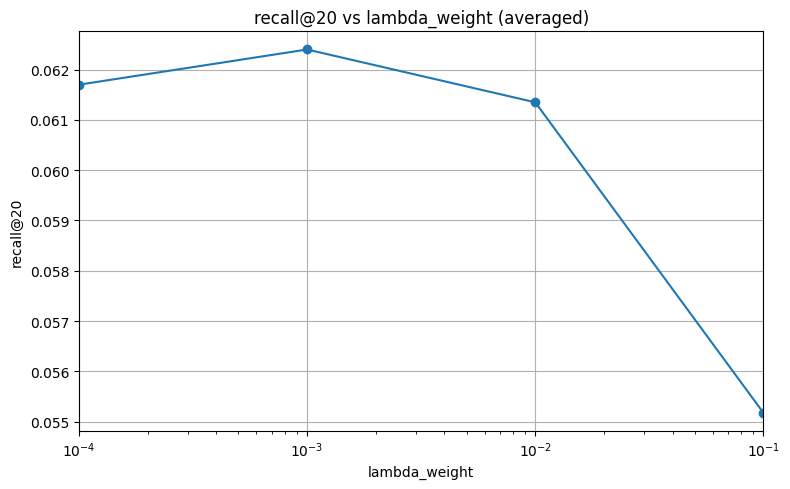

In [23]:
visualize(input_logs_text, 'lambda_weight', 'recall@20')

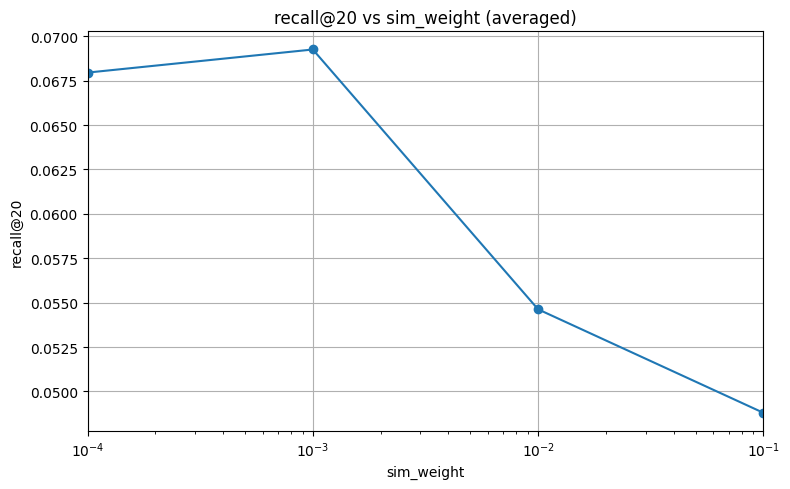

In [24]:
visualize(input_logs_text, 'sim_weight', 'recall@20')

MMT_0512

In [3]:
input_logs_text = """
Mon 12 May 2025 07:22:50 INFO 
============All Over=====================
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0357    recall@10: 0.0579    recall@20: 0.0910    ndcg@5: 0.0244    ndcg@10: 0.0315    ndcg@20: 0.0400    ,
 best test: recall@5: 0.0363    recall@10: 0.0591    recall@20: 0.0911    ndcg@5: 0.0240    ndcg@10: 0.0315    ndcg@20: 0.0397    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0355    recall@10: 0.0573    recall@20: 0.0920    ndcg@5: 0.0243    ndcg@10: 0.0313    ndcg@20: 0.0401    ,
 best test: recall@5: 0.0359    recall@10: 0.0589    recall@20: 0.0915    ndcg@5: 0.0238    ndcg@10: 0.0313    ndcg@20: 0.0397    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0359    recall@10: 0.0564    recall@20: 0.0906    ndcg@5: 0.0243    ndcg@10: 0.0309    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0573    recall@20: 0.0899    ndcg@5: 0.0237    ndcg@10: 0.0307    ndcg@20: 0.0391    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0339    recall@10: 0.0539    recall@20: 0.0865    ndcg@5: 0.0228    ndcg@10: 0.0292    ndcg@20: 0.0375    ,
 best test: recall@5: 0.0343    recall@10: 0.0547    recall@20: 0.0847    ndcg@5: 0.0226    ndcg@10: 0.0293    ndcg@20: 0.0371    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0355    recall@10: 0.0575    recall@20: 0.0910    ndcg@5: 0.0241    ndcg@10: 0.0312    ndcg@20: 0.0398    ,
 best test: recall@5: 0.0361    recall@10: 0.0581    recall@20: 0.0900    ndcg@5: 0.0241    ndcg@10: 0.0313    ndcg@20: 0.0395    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0355    recall@10: 0.0581    recall@20: 0.0913    ndcg@5: 0.0241    ndcg@10: 0.0314    ndcg@20: 0.0398    ,
 best test: recall@5: 0.0354    recall@10: 0.0586    recall@20: 0.0904    ndcg@5: 0.0242    ndcg@10: 0.0318    ndcg@20: 0.0399    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0362    recall@10: 0.0565    recall@20: 0.0903    ndcg@5: 0.0245    ndcg@10: 0.0310    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0567    recall@20: 0.0894    ndcg@5: 0.0237    ndcg@10: 0.0306    ndcg@20: 0.0389    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0331    recall@10: 0.0539    recall@20: 0.0863    ndcg@5: 0.0224    ndcg@10: 0.0291    ndcg@20: 0.0373    ,
 best test: recall@5: 0.0352    recall@10: 0.0545    recall@20: 0.0846    ndcg@5: 0.0229    ndcg@10: 0.0292    ndcg@20: 0.0369    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0374    recall@10: 0.0586    recall@20: 0.0911    ndcg@5: 0.0246    ndcg@10: 0.0315    ndcg@20: 0.0397    ,
 best test: recall@5: 0.0349    recall@10: 0.0575    recall@20: 0.0908    ndcg@5: 0.0233    ndcg@10: 0.0307    ndcg@20: 0.0393    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0366    recall@10: 0.0591    recall@20: 0.0910    ndcg@5: 0.0242    ndcg@10: 0.0315    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0567    recall@20: 0.0917    ndcg@5: 0.0237    ndcg@10: 0.0305    ndcg@20: 0.0395    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0352    recall@10: 0.0559    recall@20: 0.0881    ndcg@5: 0.0234    ndcg@10: 0.0301    ndcg@20: 0.0383    ,
 best test: recall@5: 0.0346    recall@10: 0.0556    recall@20: 0.0881    ndcg@5: 0.0228    ndcg@10: 0.0297    ndcg@20: 0.0381    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0333    recall@10: 0.0538    recall@20: 0.0847    ndcg@5: 0.0219    ndcg@10: 0.0286    ndcg@20: 0.0364    ,
 best test: recall@5: 0.0337    recall@10: 0.0543    recall@20: 0.0839    ndcg@5: 0.0217    ndcg@10: 0.0284    ndcg@20: 0.0360    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0239    recall@10: 0.0411    recall@20: 0.0665    ndcg@5: 0.0148    ndcg@10: 0.0204    ndcg@20: 0.0269    ,
 best test: recall@5: 0.0238    recall@10: 0.0416    recall@20: 0.0651    ndcg@5: 0.0154    ndcg@10: 0.0212    ndcg@20: 0.0273    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0237    recall@10: 0.0403    recall@20: 0.0670    ndcg@5: 0.0145    ndcg@10: 0.0198    ndcg@20: 0.0266    ,
 best test: recall@5: 0.0248    recall@10: 0.0396    recall@20: 0.0660    ndcg@5: 0.0157    ndcg@10: 0.0205    ndcg@20: 0.0274    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0258    recall@10: 0.0419    recall@20: 0.0688    ndcg@5: 0.0165    ndcg@10: 0.0217    ndcg@20: 0.0286    ,
 best test: recall@5: 0.0256    recall@10: 0.0412    recall@20: 0.0670    ndcg@5: 0.0166    ndcg@10: 0.0218    ndcg@20: 0.0284    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0246    recall@10: 0.0433    recall@20: 0.0696    ndcg@5: 0.0158    ndcg@10: 0.0218    ndcg@20: 0.0285    ,
 best test: recall@5: 0.0258    recall@10: 0.0429    recall@20: 0.0688    ndcg@5: 0.0165    ndcg@10: 0.0222    ndcg@20: 0.0288    
Mon 12 May 2025 07:22:50 INFO 
"""

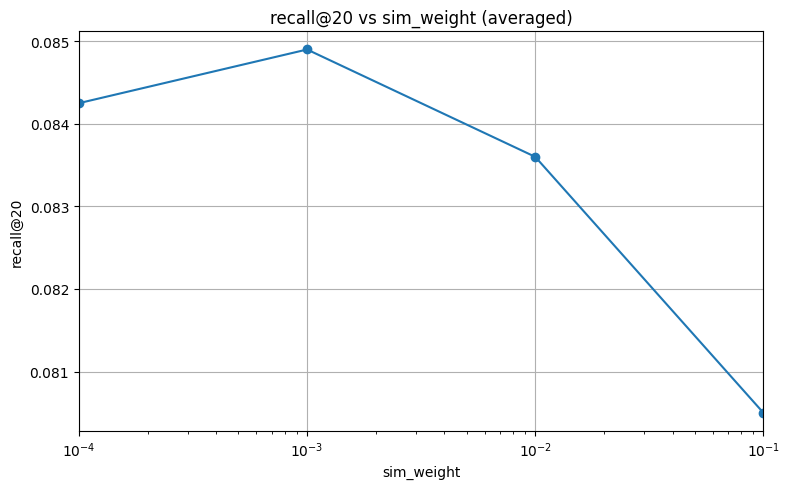

In [4]:
visualize(input_logs_text, 'sim_weight', 'recall@20')

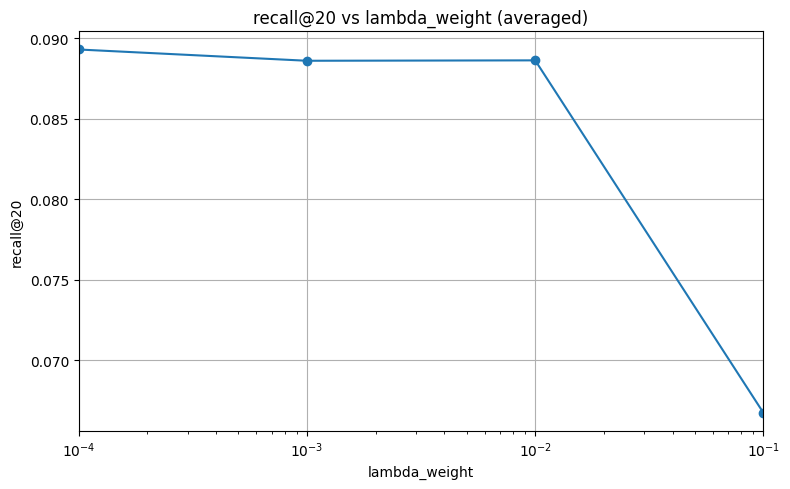

In [5]:
visualize(input_logs_text, 'lambda_weight', 'recall@20')

MMTV

In [6]:
input_logs_text = """ 
Mon 12 May 2025 10:31:31 INFO 
============All Over=====================
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0333    recall@10: 0.0513    recall@20: 0.0820    ndcg@5: 0.0221    ndcg@10: 0.0280    ndcg@20: 0.0357    ,
 best test: recall@5: 0.0337    recall@10: 0.0536    recall@20: 0.0835    ndcg@5: 0.0218    ndcg@10: 0.0283    ndcg@20: 0.0359    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0325    recall@10: 0.0515    recall@20: 0.0821    ndcg@5: 0.0219    ndcg@10: 0.0280    ndcg@20: 0.0358    ,
 best test: recall@5: 0.0333    recall@10: 0.0534    recall@20: 0.0835    ndcg@5: 0.0218    ndcg@10: 0.0283    ndcg@20: 0.0360    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0335    recall@10: 0.0509    recall@20: 0.0802    ndcg@5: 0.0221    ndcg@10: 0.0277    ndcg@20: 0.0352    ,
 best test: recall@5: 0.0334    recall@10: 0.0536    recall@20: 0.0830    ndcg@5: 0.0220    ndcg@10: 0.0286    ndcg@20: 0.0361    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0319    recall@10: 0.0488    recall@20: 0.0781    ndcg@5: 0.0211    ndcg@10: 0.0266    ndcg@20: 0.0340    ,
 best test: recall@5: 0.0323    recall@10: 0.0507    recall@20: 0.0810    ndcg@5: 0.0214    ndcg@10: 0.0274    ndcg@20: 0.0352    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0345    recall@10: 0.0542    recall@20: 0.0839    ndcg@5: 0.0227    ndcg@10: 0.0291    ndcg@20: 0.0366    ,
 best test: recall@5: 0.0341    recall@10: 0.0543    recall@20: 0.0846    ndcg@5: 0.0224    ndcg@10: 0.0290    ndcg@20: 0.0367    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0345    recall@10: 0.0542    recall@20: 0.0841    ndcg@5: 0.0228    ndcg@10: 0.0291    ndcg@20: 0.0367    ,
 best test: recall@5: 0.0339    recall@10: 0.0545    recall@20: 0.0844    ndcg@5: 0.0222    ndcg@10: 0.0290    ndcg@20: 0.0366    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0339    recall@10: 0.0528    recall@20: 0.0831    ndcg@5: 0.0218    ndcg@10: 0.0280    ndcg@20: 0.0357    ,
 best test: recall@5: 0.0332    recall@10: 0.0534    recall@20: 0.0832    ndcg@5: 0.0219    ndcg@10: 0.0285    ndcg@20: 0.0362    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0322    recall@10: 0.0507    recall@20: 0.0800    ndcg@5: 0.0212    ndcg@10: 0.0272    ndcg@20: 0.0346    ,
 best test: recall@5: 0.0318    recall@10: 0.0518    recall@20: 0.0809    ndcg@5: 0.0210    ndcg@10: 0.0275    ndcg@20: 0.0350    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0382    recall@10: 0.0588    recall@20: 0.0938    ndcg@5: 0.0247    ndcg@10: 0.0314    ndcg@20: 0.0403    ,
 best test: recall@5: 0.0354    recall@10: 0.0585    recall@20: 0.0915    ndcg@5: 0.0233    ndcg@10: 0.0309    ndcg@20: 0.0393    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0389    recall@10: 0.0602    recall@20: 0.0938    ndcg@5: 0.0249    ndcg@10: 0.0318    ndcg@20: 0.0403    ,
 best test: recall@5: 0.0368    recall@10: 0.0596    recall@20: 0.0921    ndcg@5: 0.0246    ndcg@10: 0.0320    ndcg@20: 0.0404    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0370    recall@10: 0.0596    recall@20: 0.0934    ndcg@5: 0.0240    ndcg@10: 0.0314    ndcg@20: 0.0399    ,
 best test: recall@5: 0.0371    recall@10: 0.0575    recall@20: 0.0919    ndcg@5: 0.0246    ndcg@10: 0.0313    ndcg@20: 0.0401    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0352    recall@10: 0.0566    recall@20: 0.0889    ndcg@5: 0.0227    ndcg@10: 0.0296    ndcg@20: 0.0379    ,
 best test: recall@5: 0.0347    recall@10: 0.0560    recall@20: 0.0900    ndcg@5: 0.0228    ndcg@10: 0.0298    ndcg@20: 0.0386    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0230    recall@10: 0.0397    recall@20: 0.0650    ndcg@5: 0.0148    ndcg@10: 0.0202    ndcg@20: 0.0266    ,
 best test: recall@5: 0.0224    recall@10: 0.0373    recall@20: 0.0631    ndcg@5: 0.0146    ndcg@10: 0.0195    ndcg@20: 0.0261    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0215    recall@10: 0.0390    recall@20: 0.0652    ndcg@5: 0.0137    ndcg@10: 0.0194    ndcg@20: 0.0261    ,
 best test: recall@5: 0.0214    recall@10: 0.0374    recall@20: 0.0633    ndcg@5: 0.0137    ndcg@10: 0.0190    ndcg@20: 0.0256    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0224    recall@10: 0.0386    recall@20: 0.0651    ndcg@5: 0.0139    ndcg@10: 0.0192    ndcg@20: 0.0259    ,
 best test: recall@5: 0.0227    recall@10: 0.0384    recall@20: 0.0646    ndcg@5: 0.0143    ndcg@10: 0.0195    ndcg@20: 0.0262    
Mon 12 May 2025 10:31:31 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0246    recall@10: 0.0420    recall@20: 0.0679    ndcg@5: 0.0157    ndcg@10: 0.0213    ndcg@20: 0.0279    ,
 best test: recall@5: 0.0244    recall@10: 0.0400    recall@20: 0.0668    ndcg@5: 0.0153    ndcg@10: 0.0205    ndcg@20: 0.0274    
Mon 12 May 2025 10:31:31 INFO 
"""

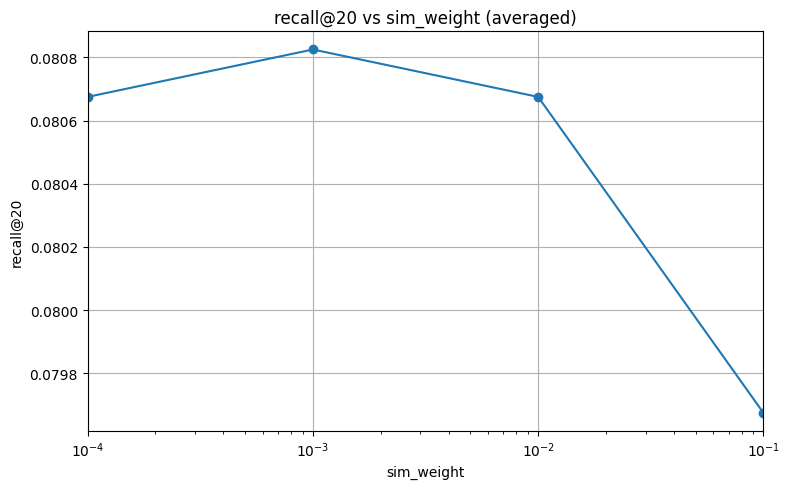

In [7]:
visualize(input_logs_text, 'sim_weight', 'recall@20')

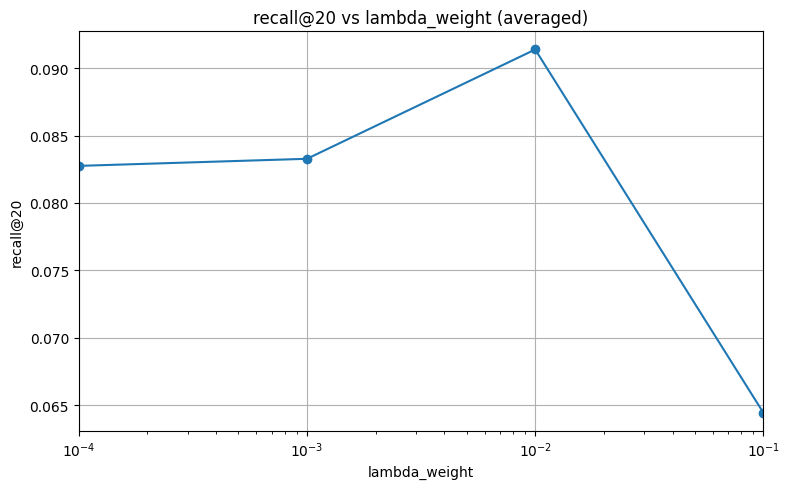

In [8]:
visualize(input_logs_text, 'lambda_weight', 'recall@20')

T_0512

In [9]:
input_logs_text = """ 
Mon 12 May 2025 07:22:50 INFO 
============All Over=====================
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0357    recall@10: 0.0579    recall@20: 0.0910    ndcg@5: 0.0244    ndcg@10: 0.0315    ndcg@20: 0.0400    ,
 best test: recall@5: 0.0363    recall@10: 0.0591    recall@20: 0.0911    ndcg@5: 0.0240    ndcg@10: 0.0315    ndcg@20: 0.0397    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0355    recall@10: 0.0573    recall@20: 0.0920    ndcg@5: 0.0243    ndcg@10: 0.0313    ndcg@20: 0.0401    ,
 best test: recall@5: 0.0359    recall@10: 0.0589    recall@20: 0.0915    ndcg@5: 0.0238    ndcg@10: 0.0313    ndcg@20: 0.0397    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0359    recall@10: 0.0564    recall@20: 0.0906    ndcg@5: 0.0243    ndcg@10: 0.0309    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0573    recall@20: 0.0899    ndcg@5: 0.0237    ndcg@10: 0.0307    ndcg@20: 0.0391    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0339    recall@10: 0.0539    recall@20: 0.0865    ndcg@5: 0.0228    ndcg@10: 0.0292    ndcg@20: 0.0375    ,
 best test: recall@5: 0.0343    recall@10: 0.0547    recall@20: 0.0847    ndcg@5: 0.0226    ndcg@10: 0.0293    ndcg@20: 0.0371    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0355    recall@10: 0.0575    recall@20: 0.0910    ndcg@5: 0.0241    ndcg@10: 0.0312    ndcg@20: 0.0398    ,
 best test: recall@5: 0.0361    recall@10: 0.0581    recall@20: 0.0900    ndcg@5: 0.0241    ndcg@10: 0.0313    ndcg@20: 0.0395    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0355    recall@10: 0.0581    recall@20: 0.0913    ndcg@5: 0.0241    ndcg@10: 0.0314    ndcg@20: 0.0398    ,
 best test: recall@5: 0.0354    recall@10: 0.0586    recall@20: 0.0904    ndcg@5: 0.0242    ndcg@10: 0.0318    ndcg@20: 0.0399    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0362    recall@10: 0.0565    recall@20: 0.0903    ndcg@5: 0.0245    ndcg@10: 0.0310    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0567    recall@20: 0.0894    ndcg@5: 0.0237    ndcg@10: 0.0306    ndcg@20: 0.0389    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0331    recall@10: 0.0539    recall@20: 0.0863    ndcg@5: 0.0224    ndcg@10: 0.0291    ndcg@20: 0.0373    ,
 best test: recall@5: 0.0352    recall@10: 0.0545    recall@20: 0.0846    ndcg@5: 0.0229    ndcg@10: 0.0292    ndcg@20: 0.0369    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0374    recall@10: 0.0586    recall@20: 0.0911    ndcg@5: 0.0246    ndcg@10: 0.0315    ndcg@20: 0.0397    ,
 best test: recall@5: 0.0349    recall@10: 0.0575    recall@20: 0.0908    ndcg@5: 0.0233    ndcg@10: 0.0307    ndcg@20: 0.0393    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0366    recall@10: 0.0591    recall@20: 0.0910    ndcg@5: 0.0242    ndcg@10: 0.0315    ndcg@20: 0.0396    ,
 best test: recall@5: 0.0357    recall@10: 0.0567    recall@20: 0.0917    ndcg@5: 0.0237    ndcg@10: 0.0305    ndcg@20: 0.0395    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0352    recall@10: 0.0559    recall@20: 0.0881    ndcg@5: 0.0234    ndcg@10: 0.0301    ndcg@20: 0.0383    ,
 best test: recall@5: 0.0346    recall@10: 0.0556    recall@20: 0.0881    ndcg@5: 0.0228    ndcg@10: 0.0297    ndcg@20: 0.0381    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0333    recall@10: 0.0538    recall@20: 0.0847    ndcg@5: 0.0219    ndcg@10: 0.0286    ndcg@20: 0.0364    ,
 best test: recall@5: 0.0337    recall@10: 0.0543    recall@20: 0.0839    ndcg@5: 0.0217    ndcg@10: 0.0284    ndcg@20: 0.0360    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0239    recall@10: 0.0411    recall@20: 0.0665    ndcg@5: 0.0148    ndcg@10: 0.0204    ndcg@20: 0.0269    ,
 best test: recall@5: 0.0238    recall@10: 0.0416    recall@20: 0.0651    ndcg@5: 0.0154    ndcg@10: 0.0212    ndcg@20: 0.0273    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0237    recall@10: 0.0403    recall@20: 0.0670    ndcg@5: 0.0145    ndcg@10: 0.0198    ndcg@20: 0.0266    ,
 best test: recall@5: 0.0248    recall@10: 0.0396    recall@20: 0.0660    ndcg@5: 0.0157    ndcg@10: 0.0205    ndcg@20: 0.0274    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0258    recall@10: 0.0419    recall@20: 0.0688    ndcg@5: 0.0165    ndcg@10: 0.0217    ndcg@20: 0.0286    ,
 best test: recall@5: 0.0256    recall@10: 0.0412    recall@20: 0.0670    ndcg@5: 0.0166    ndcg@10: 0.0218    ndcg@20: 0.0284    
Mon 12 May 2025 07:22:50 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0246    recall@10: 0.0433    recall@20: 0.0696    ndcg@5: 0.0158    ndcg@10: 0.0218    ndcg@20: 0.0285    ,
 best test: recall@5: 0.0258    recall@10: 0.0429    recall@20: 0.0688    ndcg@5: 0.0165    ndcg@10: 0.0222    ndcg@20: 0.0288    
Mon 12 May 2025 07:22:50 INFO 
"""

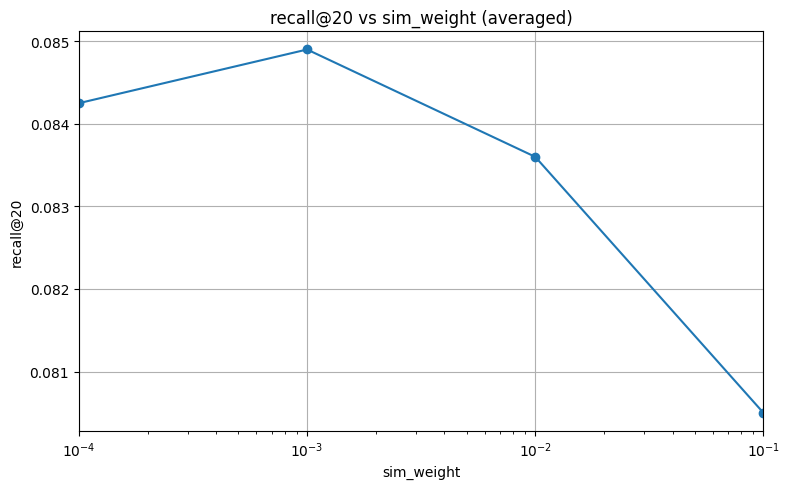

In [10]:
visualize(input_logs_text, 'sim_weight', 'recall@20')

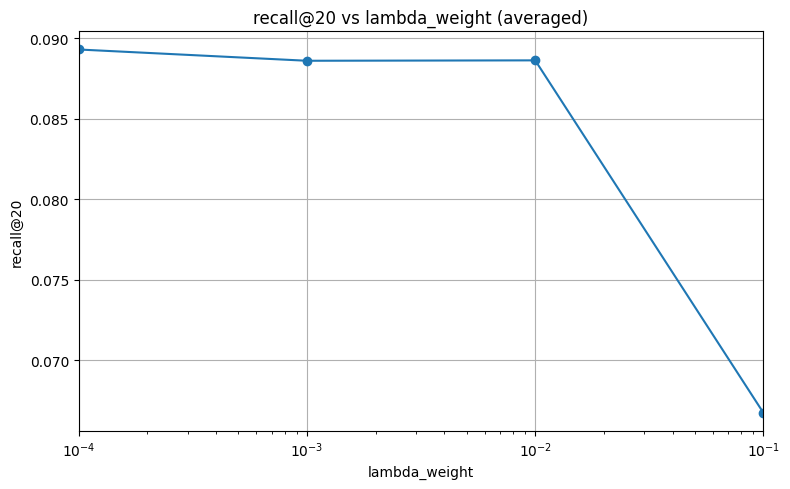

In [11]:
visualize(input_logs_text, 'lambda_weight', 'recall@20')

TV_0512

In [12]:
input_logs_text = """ Mon 12 May 2025 08:26:07 INFO 
============All Over=====================
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0331    recall@10: 0.0512    recall@20: 0.0809    ndcg@5: 0.0221    ndcg@10: 0.0280    ndcg@20: 0.0355    ,
 best test: recall@5: 0.0315    recall@10: 0.0530    recall@20: 0.0831    ndcg@5: 0.0210    ndcg@10: 0.0280    ndcg@20: 0.0357    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0326    recall@10: 0.0511    recall@20: 0.0811    ndcg@5: 0.0218    ndcg@10: 0.0279    ndcg@20: 0.0355    ,
 best test: recall@5: 0.0320    recall@10: 0.0530    recall@20: 0.0831    ndcg@5: 0.0211    ndcg@10: 0.0280    ndcg@20: 0.0357    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0327    recall@10: 0.0506    recall@20: 0.0800    ndcg@5: 0.0218    ndcg@10: 0.0276    ndcg@20: 0.0350    ,
 best test: recall@5: 0.0322    recall@10: 0.0514    recall@20: 0.0822    ndcg@5: 0.0209    ndcg@10: 0.0272    ndcg@20: 0.0351    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.0001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0306    recall@10: 0.0489    recall@20: 0.0785    ndcg@5: 0.0207    ndcg@10: 0.0267    ndcg@20: 0.0341    ,
 best test: recall@5: 0.0312    recall@10: 0.0505    recall@20: 0.0790    ndcg@5: 0.0206    ndcg@10: 0.0269    ndcg@20: 0.0342    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0342    recall@10: 0.0527    recall@20: 0.0822    ndcg@5: 0.0224    ndcg@10: 0.0285    ndcg@20: 0.0359    ,
 best test: recall@5: 0.0332    recall@10: 0.0527    recall@20: 0.0840    ndcg@5: 0.0218    ndcg@10: 0.0282    ndcg@20: 0.0362    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0339    recall@10: 0.0519    recall@20: 0.0825    ndcg@5: 0.0224    ndcg@10: 0.0283    ndcg@20: 0.0360    ,
 best test: recall@5: 0.0332    recall@10: 0.0529    recall@20: 0.0829    ndcg@5: 0.0218    ndcg@10: 0.0282    ndcg@20: 0.0359    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0327    recall@10: 0.0507    recall@20: 0.0808    ndcg@5: 0.0218    ndcg@10: 0.0277    ndcg@20: 0.0353    ,
 best test: recall@5: 0.0319    recall@10: 0.0520    recall@20: 0.0807    ndcg@5: 0.0208    ndcg@10: 0.0274    ndcg@20: 0.0348    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.001, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0308    recall@10: 0.0498    recall@20: 0.0803    ndcg@5: 0.0207    ndcg@10: 0.0269    ndcg@20: 0.0346    ,
 best test: recall@5: 0.0309    recall@10: 0.0511    recall@20: 0.0798    ndcg@5: 0.0204    ndcg@10: 0.0270    ndcg@20: 0.0344    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0363    recall@10: 0.0572    recall@20: 0.0894    ndcg@5: 0.0235    ndcg@10: 0.0303    ndcg@20: 0.0384    ,
 best test: recall@5: 0.0339    recall@10: 0.0571    recall@20: 0.0889    ndcg@5: 0.0223    ndcg@10: 0.0299    ndcg@20: 0.0381    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0365    recall@10: 0.0567    recall@20: 0.0890    ndcg@5: 0.0235    ndcg@10: 0.0300    ndcg@20: 0.0383    ,
 best test: recall@5: 0.0341    recall@10: 0.0566    recall@20: 0.0899    ndcg@5: 0.0223    ndcg@10: 0.0297    ndcg@20: 0.0382    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0353    recall@10: 0.0556    recall@20: 0.0868    ndcg@5: 0.0230    ndcg@10: 0.0296    ndcg@20: 0.0375    ,
 best test: recall@5: 0.0333    recall@10: 0.0549    recall@20: 0.0883    ndcg@5: 0.0219    ndcg@10: 0.0290    ndcg@20: 0.0376    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.01, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0320    recall@10: 0.0538    recall@20: 0.0845    ndcg@5: 0.0213    ndcg@10: 0.0284    ndcg@20: 0.0362    ,
 best test: recall@5: 0.0326    recall@10: 0.0522    recall@20: 0.0847    ndcg@5: 0.0213    ndcg@10: 0.0278    ndcg@20: 0.0361    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.0001),
 best valid: recall@5: 0.0238    recall@10: 0.0411    recall@20: 0.0662    ndcg@5: 0.0155    ndcg@10: 0.0211    ndcg@20: 0.0275    ,
 best test: recall@5: 0.0251    recall@10: 0.0403    recall@20: 0.0635    ndcg@5: 0.0163    ndcg@10: 0.0213    ndcg@20: 0.0273    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.001),
 best valid: recall@5: 0.0234    recall@10: 0.0407    recall@20: 0.0666    ndcg@5: 0.0148    ndcg@10: 0.0204    ndcg@20: 0.0270    ,
 best test: recall@5: 0.0232    recall@10: 0.0397    recall@20: 0.0656    ndcg@5: 0.0147    ndcg@10: 0.0201    ndcg@20: 0.0268    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.01),
 best valid: recall@5: 0.0253    recall@10: 0.0416    recall@20: 0.0684    ndcg@5: 0.0163    ndcg@10: 0.0216    ndcg@20: 0.0284    ,
 best test: recall@5: 0.0249    recall@10: 0.0415    recall@20: 0.0667    ndcg@5: 0.0162    ndcg@10: 0.0217    ndcg@20: 0.0282    
Mon 12 May 2025 08:26:07 INFO Parameters: ['seed', 'lambda_weight', 'cl_loss', 'learning_rate', 'n_layers', 'knn_k', 'sim_weight']=(999, 0.1, 0.01, 0.001, 1, 10, 0.1),
 best valid: recall@5: 0.0259    recall@10: 0.0433    recall@20: 0.0688    ndcg@5: 0.0162    ndcg@10: 0.0219    ndcg@20: 0.0284    ,
 best test: recall@5: 0.0255    recall@10: 0.0428    recall@20: 0.0685    ndcg@5: 0.0163    ndcg@10: 0.0220    ndcg@20: 0.0286    
Mon 12 May 2025 08:26:07 INFO """

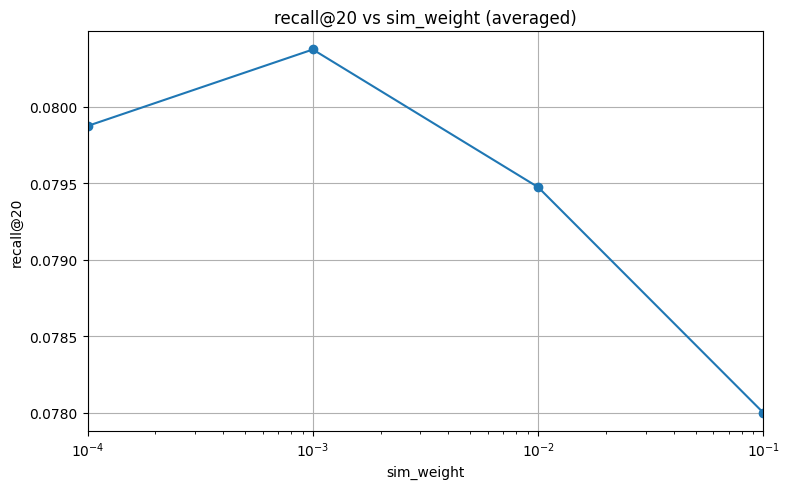

In [13]:
visualize(input_logs_text, 'sim_weight', 'recall@20')

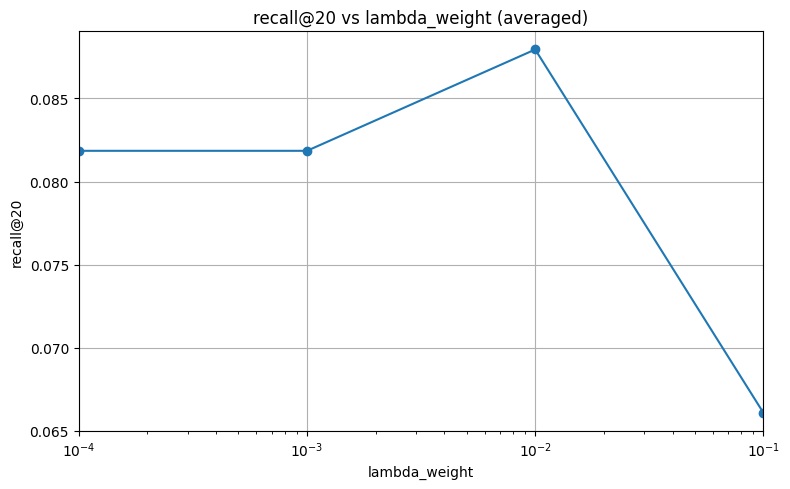

In [14]:
visualize(input_logs_text, 'lambda_weight', 'recall@20')